<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vader" data-toc-modified-id="Vader-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vader</a></span></li><li><span><a href="#Text-Blob" data-toc-modified-id="Text-Blob-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text Blob</a></span></li></ul></div>

# Libraries

In [1]:
import pandas as pd

import functions

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data

In [2]:
data = pd.read_csv('/Users/antoniooliveira/Downloads/airlines_reviews.csv')

In [3]:
data.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Seat Comfort,8100.0,3.414815,1.397183,1.0,2.0,4.0,5.0,5.0
Staff Service,8100.0,3.569877,1.527436,1.0,2.0,4.0,5.0,5.0
Food & Beverages,8100.0,3.384074,1.455694,1.0,2.0,4.0,5.0,5.0
Inflight Entertainment,8100.0,3.636790,1.309564,0.0,3.0,4.0,5.0,5.0
Value For Money,8100.0,3.148642,1.589377,1.0,1.0,3.0,5.0,5.0
Overall Rating,8100.0,5.632469,3.523664,1.0,2.0,6.0,9.0,10.0


# Exploratory Data Analysis

Unique Values

In [6]:
for column in data.columns:
    print(data[column].value_counts(), '\n')


Title
Turkish Airlines customer review    11
Qatar Airways customer review       11
worst customer service               9
a pleasant experience                9
seats were comfortable               8
                                    ..
very comfortable experience          1
not impressed by the performance     1
ANA is simply the best               1
bad communication                    1
genuinely friendly staff             1
Name: count, Length: 7614, dtype: int64 

Name
Michael Schade        44
Anders Pedersen       40
Michel Perrin         29
Alwaleed Althani      27
Elaine Loh            23
                      ..
G Deene                1
G Hayes                1
Jacob Chundamannil     1
Ann Sebastian          1
D Lanor                1
Name: count, Length: 6583, dtype: int64 

Review Date
2017-12-18    12
2018-10-17    11
2019-10-16    11
2018-09-18    11
2019-09-22    11
              ..
2019-09-10     1
2018-12-26     1
2018-04-17     1
2017-06-23     1
2024-03-01     1
Na

Missing Values

In [7]:
data.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64

Checking for Incoherencies

In [8]:
data.sort_values(by='Review Date', ascending=False)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
2596,business seating is very comfortable,Susan James,2024-03-06,All Nippon Airways,False,"ANA has great service, very clean restrooms ...",Couple Leisure,March 2024,Ho Chi Minh City to Tokyo,Business Class,4,5,4,4,5,10,yes
4405,don't waste money on Business,S Dunlop,2024-03-04,Turkish Airlines,True,Do not waste money on a Business Class fligh...,Business,February 2024,Manchester to Kathmandu via Istanbul,Business Class,3,3,3,3,1,3,no
2854,certainly not a premium airline,E Galetski,2024-03-04,Emirates,True,Our BKK-DXB flight was delayed for 18 hours ...,Family Leisure,February 2024,Bangkok to Warsaw via Dubai,Economy Class,3,1,3,4,1,1,no
2855,Qatar Airways really puts them to shame,E Bayaz,2024-03-04,Emirates,True,Definitely not the standard I would expect f...,Solo Leisure,March 2024,London Stansted to Lahore via Dubai,Business Class,4,3,1,1,2,3,no
4406,cabin crew they seemed indifferent,S Dunlop,2024-03-04,Turkish Airlines,True,"The plane was antiquated, my footrest box un...",Business,January 2024,Bogota to Istanbul,Business Class,4,1,1,1,2,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,a beautiful looking plane,Fiona Teo,2016-03-24,Singapore Airlines,False,Flew economy on Singapore to Kuala Lumpur re...,Business,March 2016,MNL to SIN,Economy Class,2,5,5,4,2,8,yes
969,crew were very relaxed,S Gooneratne,2016-03-23,Singapore Airlines,False,"Dhaka to Melbourne via Singapore, flights op...",Business,March 2016,MEL to DEL via SIN,Economy Class,5,5,3,4,4,9,yes
6089,probably never fly them again,Mona Farrugia,2016-03-23,Turkish Airlines,False,Malta to Kilimanjaro via Dar es Salaam. We a...,Couple Leisure,March 2016,IAH to KHI,Business Class,4,5,3,5,2,2,no
970,Food and IFE average,S Gooneratne,2016-03-22,Singapore Airlines,True,Melbourne to Delhi via Singapore. Check in f...,Business,March 2016,SIN to CAN,Economy Class,3,5,4,4,4,6,yes


In [9]:
#Create new function to convert Rating scores to 3 categories
#1-3, 4-7, 8-10 forms negative, neutral, positive [0,1,2]
def score_convert_senti(score):
    if score <= 3:
        return 0
    elif score >= 4 and score <= 7:
        return 1
    elif score >= 8:
        return 2

#Create new column, convert scoring into 3 categories
data["Sentiment"] = data["Overall Rating"].apply(score_convert_senti)

#dataset has derived sentiment column added
data.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,0
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2


# Preprocessing for Lexicon-based

In [64]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [10]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import regex as re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import regex as re
import unicodedata
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from textblob import TextBlob
import emoji


def stopword_remover(tokenized_comment, stop_words):
    clean_comment = []
    for token in tokenized_comment:
        if token not in stop_words:
            clean_comment.append(token)
    return clean_comment

def preprocessor(raw_text, 
                 lowercase=True, 
                 leave_punctuation=False, 
                 remove_stopwords=True,
                 stop_words=None,
                 correct_spelling=False, 
                 lemmatization=False, 
                 porter_stemming=False,
                 tokenized_output=False, 
                 sentence_output=False,
                 remove_emojis = False
                 ):
    
    clean_text = raw_text

    if lowercase:
        if any(ord(char) > 127 for char in clean_text):
            clean_text = ''.join([unicodedata.normalize('NFKD', char).lower() for char in clean_text])
        else:
            clean_text = clean_text.lower()

    clean_text = re.sub(r'(\**\\[nrt]|</ul>)',' ',clean_text) 
    
    if not leave_punctuation:    
        clean_text = re.compile(r'[^\w\s]').sub(' ', clean_text)
    
    clean_text = re.sub(r'(\bhttp[^\s]+\b)',' ',clean_text)
    clean_text = re.sub(r'\b([^aeiou-])\b',' ',clean_text)

    if correct_spelling:
        incorrect_text = TextBlob(clean_text)
        clean_text = incorrect_text.correct()
        
    clean_text = word_tokenize(str(clean_text))
    
    if remove_stopwords:
        clean_text = stopword_remover(clean_text, stop_words)
        
    if lemmatization:
        for pos_tag in ["v","n","a"]:
            clean_text = [lemmatizer.lemmatize(token, pos=pos_tag) for token in clean_text]
    elif porter_stemming:  
        porter_stemmer = PorterStemmer()
        clean_text = [porter_stemmer.stem(token) for token in clean_text]
    
    if not tokenized_output:
        clean_text = " ".join(clean_text)
        clean_text = re.sub(r'(\s)(?!\w)','',clean_text)

    if sentence_output:
        clean_text = sent_tokenizer.tokenize(str(clean_text))
    
    # Adding emoji check
    if remove_emojis:  # Check if removing emojis is requested
        clean_text = emoji.demojize(clean_text)  # Convert emojis to text

    return clean_text


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
data['Reviews_1'] = data['Reviews'].apply(lambda text: preprocessor(text,
                 lowercase=False, 
                 leave_punctuation = True, 
                 remove_stopwords = True,
                 stop_words = stop_words,
                 correct_spelling = False, 
                 lemmatization=False, 
                 porter_stemming=True,
                 tokenized_output=False, 
                 sentence_output=False,
                 remove_emojis=True))

In [71]:
data['Reviews_1'].sample()

7232    melbourn lo angel via hong kong. hope never ge...
Name: Reviews_1, dtype: object

## Vader

In [72]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [73]:
def vader_sa(song, compound = True):

    # Get the polarity scores (negative, neutral and positive) for the song
    polarity_scores_ = vader.polarity_scores(song)
    
    # If you want to compound the scores into one final score
    if compound:
        polarity = polarity_scores_["compound"]

    # If you want the three scores
    else:
        # The three separated scores
        polarity = polarity_scores_

    return polarity

In [74]:
data["vader_polarity_compound"] = data["Reviews_1"].apply(lambda song : vader_sa(str(song)))

data["vader_polarity_scores"] = data["Reviews_1"].apply(lambda song : vader_sa(str(song), compound = False))

In [75]:
data.sample(5)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1,vader_polarity_compound,vader_polarity_scores,textblob_polarity_compound
3102,our worst flight ever,D Dane,2022-01-29,Emirates,True,My family was flying from Male to Dubai and ...,Family Leisure,January 2022,Chicago to Dubai,Economy Class,...,1,2,2,2,no,0,my famili fli male dubai worst flight ever. at...,0.8910,"{'neg': 0.045, 'neu': 0.763, 'pos': 0.193, 'co...",-0.050000
8072,exceptionally good value,D Larassa,2017-01-24,Korean Air,False,Auckland to London via Seoul. Excellent comm...,Couple Leisure,January 2017,Auckland to London via Seoul,Business Class,...,4,5,5,10,yes,2,auckland london via seoul. excel commun advis ...,0.9670,"{'neg': 0.028, 'neu': 0.684, 'pos': 0.288, 'co...",0.539286
7710,pointed to where to get luggage,G Carleno,2019-12-08,EVA Air,True,Tokyo to San Francisco via Taipei. EVA needs...,Solo Leisure,November 2019,Tokyo to San Francisco via Taipei,Premium Economy,...,4,3,5,8,yes,2,tokyo san francisco via taipei. eva need under...,0.9325,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.130357
3134,25 hours sitting in the airport,N Zaid,2021-09-03,Emirates,True,First and hugest disappointment and shock ha...,Family Leisure,August 2021,Beirut to Dallas Ft Worth via Dubai,Economy Class,...,3,3,3,1,no,0,first hugest disappoint shock happen open appl...,-0.9015,"{'neg': 0.126, 'neu': 0.847, 'pos': 0.027, 'co...",0.062905
148,It was a 5/10 flight,N Beale,2022-12-28,Singapore Airlines,True,The flight seemed quite full with huge line ...,Couple Leisure,December 2022,Singapore to Ho Chi Minh City,Business Class,...,2,4,2,5,no,1,the flight seem quit full huge line gate secur...,0.4215,"{'neg': 0.147, 'neu': 0.697, 'pos': 0.156, 'co...",0.250441


In [76]:
data.groupby('Sentiment')['vader_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.129558,0.650024,-0.9914,-0.7430,-0.27320,0.4939,0.9944
1,1672.0,0.422056,0.588594,-0.9868,0.0258,0.68080,0.9022,0.9938
2,3406.0,0.802642,0.293201,-0.9300,0.7906,0.91255,0.9571,0.9984


In [81]:
data.loc[(data['vader_polarity_compound'] > 0.5) & (data['Sentiment'] == 0)]

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1,vader_polarity_compound,vader_polarity_scores,textblob_polarity_compound
13,regional seat was really uncomfortable,L Hee,2024-02-16,Singapore Airlines,True,I was one of the last business class passeng...,Solo Leisure,January 2024,Singapore to Tokyo Haneda,Business Class,...,5,5,3,2,yes,0,"one last busi class passeng board, went seat o...",0.8126,"{'neg': 0.02, 'neu': 0.867, 'pos': 0.113, 'com...",0.209259
19,not fly with them in the future,H Paran,2024-01-18,Singapore Airlines,True,I flew on SQ217 from Singapore to Melbourne ...,Couple Leisure,January 2024,Singapore to Melbourne,Economy Class,...,1,1,1,2,no,0,flew sq217 singapor melbourn 4th januari. my f...,0.8290,"{'neg': 0.088, 'neu': 0.784, 'pos': 0.128, 'co...",-0.040625
25,Deficient reservation system,Pierre Visseur,2023-12-27,Singapore Airlines,False,We made a Phuket-Singapore round trip which ...,Business,December 2023,Phuket to Singapore,Business Class,...,4,4,2,2,no,0,"we made phuket-singapor round trip exemplari, ...",0.6369,"{'neg': 0.04, 'neu': 0.905, 'pos': 0.056, 'com...",0.107744
30,“No inflight entertainment at all”,Ming Teoh,2023-12-11,Singapore Airlines,False,"No inflight entertainment at all. Yes, we ar...",Solo Leisure,December 2023,Singapore to Penang,Economy Class,...,5,3,1,1,no,0,"no inflight entertain. ye, talk singapor airli...",0.8074,"{'neg': 0.04, 'neu': 0.786, 'pos': 0.174, 'com...",0.186667
36,Never again Singapore Airlines,Vibor Cilic,2023-11-18,Singapore Airlines,True,We had the most horrific check-in experience ...,Family Leisure,November 2023,New York to Frankfurt,Economy Class,...,3,3,1,1,no,0,we horrif check-in experi singapor airlin nov....,0.9390,"{'neg': 0.063, 'neu': 0.827, 'pos': 0.11, 'com...",0.105269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,flight attendants were terrible,S Chanson,2017-12-09,Korean Air,True,Bangkok to Atlanta via Seoul. My husband boo...,Solo Leisure,December 2017,Bangkok to Atlanta via Seoul,Business Class,...,1,4,1,1,no,0,bangkok atlanta via seoul. my husband book fli...,0.9118,"{'neg': 0.046, 'neu': 0.839, 'pos': 0.115, 'co...",0.161905
8048,totally unacceptable service,Nicholas Hurley,2017-09-20,Korean Air,True,Seoul to Hanoi. I wish to register my absolu...,Business,September 2017,Seoul to Hanoi,Economy Class,...,4,4,2,2,no,0,seoul hanoi. wish regist absolut disgust total...,0.7018,"{'neg': 0.075, 'neu': 0.811, 'pos': 0.114, 'co...",0.055556
8061,never take Korean Air anymore,Y Peck,2017-05-13,Korean Air,False,Singapore to Seoul return. I will never take...,Family Leisure,May 2017,Seoul to Singapore,Economy Class,...,4,2,1,1,no,0,singapor seoul return. never take korean air a...,0.6948,"{'neg': 0.109, 'neu': 0.699, 'pos': 0.191, 'co...",-0.168056
8078,my last flight with them,Julia Lee,2016-12-13,Korean Air,True,"Hong Kong to Nadi, Fiji via Seoul. It was my...",Solo Leisure,December 2016,HKG to NAN via ICN,Economy Class,...,4,3,2,1,no,0,"hong kong nadi, fiji via seoul. it first fligh...",0.9050,"{'neg': 0.125, 'neu': 0.679, 'pos': 0.196, 'co...",0.092121


--------------------------------------------------------------------------------
                               Sentiment: 0


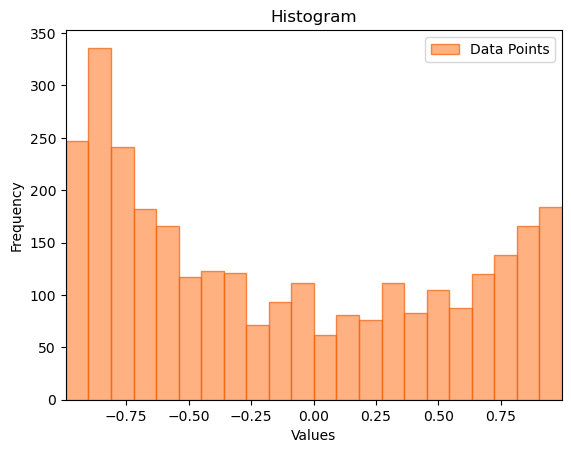


--------------------------------------------------------------------------------
                               Sentiment: 1


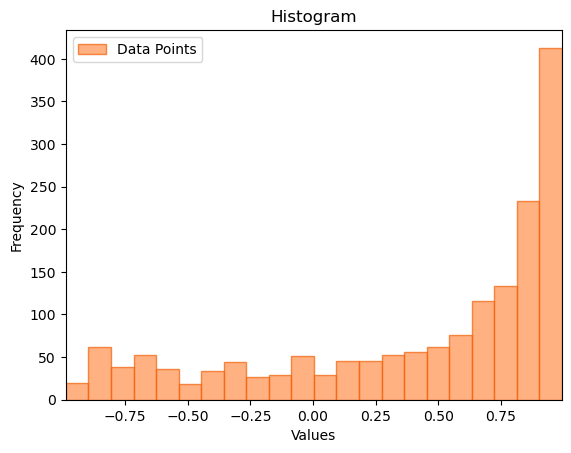


--------------------------------------------------------------------------------
                               Sentiment: 2


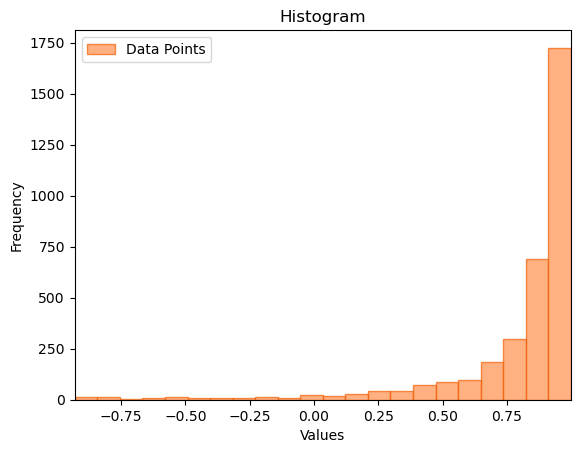

In [77]:
# Get unique values of 'Overall Rating' column and sort them in ascending order
unique_tags = sorted(data['Sentiment'].unique())

# Loop through sorted unique tags
for tag in unique_tags:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {tag}')
    functions.histogram(data[data['Sentiment'] == tag]['vader_polarity_compound'])
    print('')


--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 0


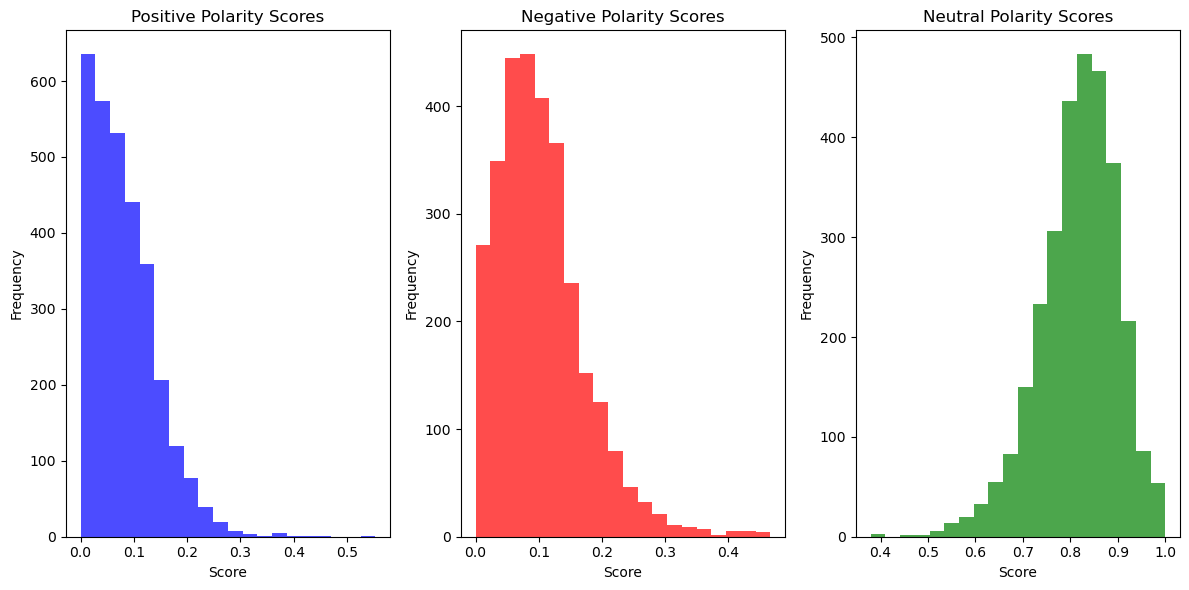

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 1


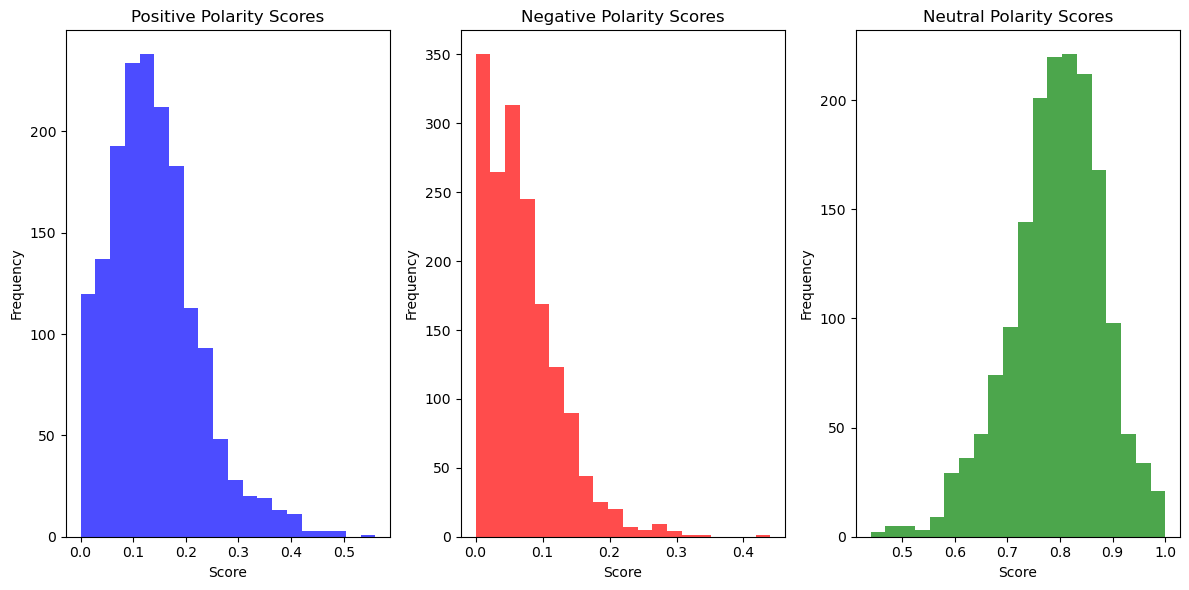

--------------------------------------------------------------------------------------------------------------
                                                   Sentiment: 2


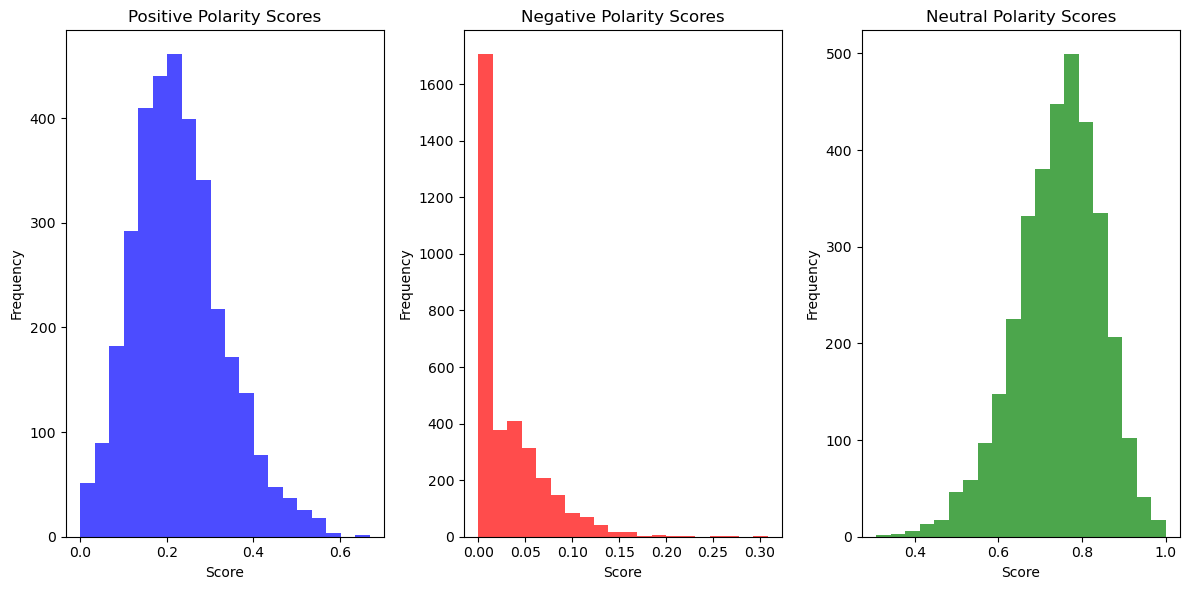

In [54]:
unique_sentiments = sorted(data['Sentiment'].unique())
import matplotlib.pyplot as plt
# Loop through sorted unique sentiments
for sentiment in unique_sentiments:
    print('--' * 55)
    print(' ' * 50, f'Sentiment: {sentiment}')
    
    # Get Vader polarity scores for the current sentiment
    vader_scores = data[data['Sentiment'] == sentiment]['vader_polarity_scores']

    # Plot histogram for each polarity score
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.hist(vader_scores.apply(lambda x: x['pos']), bins=20, color='blue', alpha=0.7)
    plt.title('Positive Polarity Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.hist(vader_scores.apply(lambda x: x['neg']), bins=20, color='red', alpha=0.7)
    plt.title('Negative Polarity Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(vader_scores.apply(lambda x: x['neu']), bins=20, color='green', alpha=0.7)
    plt.title('Neutral Polarity Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

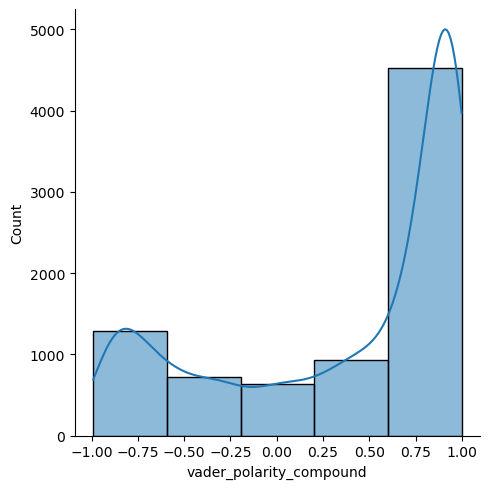

In [55]:
import seaborn as sns
score_graph = sns.displot(data["vader_polarity_compound"], kde=True, bins=5)
plt.show()

In [56]:
data['Sentiment'].unique()

array([2, 0, 1])

Sentiment 2


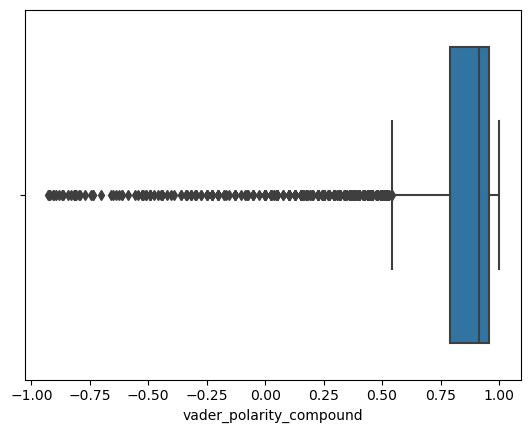

Sentiment 0


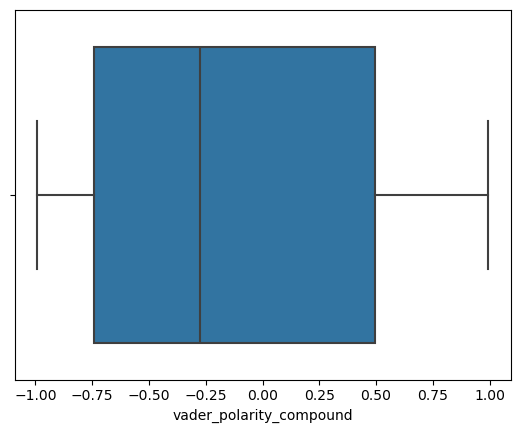

Sentiment 1


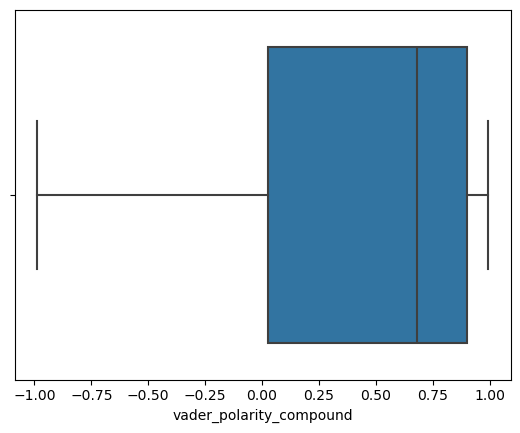

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data based on the condition

for i in data['Sentiment'].unique():
    filtered_data = data[data['Sentiment'] == i]

# Plot the boxplot
    print(f'Sentiment {i}')
    sns.boxplot(data=filtered_data, x="vader_polarity_compound")
    plt.show()


## Text Blob

In [82]:
def textblob_sa(song):

    # Get the polarity (compounded polarity scores) for the song
    polarity = TextBlob(song).sentiment.polarity

    return polarity


In [83]:
data["textblob_polarity_compound"] = data["Reviews_1"].apply(lambda song : textblob_sa(str(song)))

In [84]:
data.sample(5)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1,vader_polarity_compound,vader_polarity_scores,textblob_polarity_compound
3030,they don't live up to their reputation,Caroline Lane,2022-08-25,Emirates,False,After being concerned about our Qantas BC fl...,Couple Leisure,August 2022,Beirut to Sydney via Dubai,Business Class,...,1,3,3,4,no,1,"after concern qanta bc flight singapor issu, r...",0.7003,"{'neg': 0.086, 'neu': 0.78, 'pos': 0.133, 'com...",-0.079545
3271,"nice flight, I would not rush back",P Callino,2019-12-27,Emirates,True,Sydney to Dubai in first class was not amazi...,Solo Leisure,December 2019,New York to Kolkata via Dubai,First Class,...,3,3,3,6,yes,1,sydney dubai first class amaz nice. the servic...,0.9756,"{'neg': 0.061, 'neu': 0.684, 'pos': 0.255, 'co...",0.280000
4041,distinctly average experience,Adele Malcolm,2016-12-25,Emirates,True,This was the 2nd leg of our journey from Gat...,Couple Leisure,December 2016,JFK to MAA via DXB,Business Class,...,2,4,3,5,no,1,thi 2nd leg journey gatwick ho chi minh citi e...,0.9686,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.252778
918,frequent drinks brought around,A Hardill,2016-07-30,Singapore Airlines,True,Barcelona to Sao Paulo. First flight with Si...,Solo Leisure,January 2016,SIN to MEL,Economy Class,...,2,4,5,9,yes,2,barcelona sao paulo. first flight singapor air...,0.9260,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.341667
2554,be aware if flight delayed,R Clarke,2016-05-22,Qatar Airways,False,Be aware if your flight is delayed. QR1111 B...,Solo Leisure,May 2016,DOH to SYD,Business Class,...,5,5,4,4,yes,1,be awar flight delay. qr1111 bahrain doha dela...,0.5574,"{'neg': 0.116, 'neu': 0.737, 'pos': 0.146, 'co...",0.372222


In [85]:
data.groupby('Sentiment')['textblob_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.006360,0.191770,-1.00,-0.100852,0.000000,0.095979,1.0
1,1672.0,0.134014,0.188282,-0.75,0.013687,0.131897,0.247851,1.0
2,3406.0,0.294672,0.196097,-0.50,0.166705,0.283333,0.404167,1.0


In [86]:
data.loc[(data['textblob_polarity_compound'] > 0.5) & (data['Sentiment'] == 0)]

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,...,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1,vader_polarity_compound,vader_polarity_scores,textblob_polarity_compound
1231,informed that there are technical problems,E Koehler,2022-11-27,Qatar Airways,True,"The flight to Singapore was okay at best, se...",Couple Leisure,November 2022,Singapore to Doha,Economy Class,...,5,5,1,1,no,0,"the flight singapor okay best, seat close. foo...",0.7430,"{'neg': 0.054, 'neu': 0.765, 'pos': 0.181, 'co...",0.550000
1996,not that great,Ramachandran Ashok Kumar,2018-11-17,Qatar Airways,True,Bangalore to Nice via Doha. My experience fr...,Business,November 2018,Doha to Manchester,Economy Class,...,5,5,1,1,no,0,bangalor nice via doha. my experi great comfor...,0.9840,"{'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'comp...",0.685714
2529,a great experience,Susan John,2016-07-13,Qatar Airways,True,Excellent service and a great experience wit...,Business,July 2016,LHR to MLE via DOH,Business Class,...,1,3,5,3,yes,0,excel servic great experi qatar airway fli doh...,0.9118,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.800000
2552,seat was comfortable,Ming Zhang,2016-05-27,Qatar Airways,True,I returned from London Heathrow to Shanghai ...,Solo Leisure,May 2016,PSA to AKL via DOH,Business Class,...,1,4,4,1,yes,0,return london heathrow shanghai qatar airway. ...,0.9628,"{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'comp...",0.513333
3001,took a fine of 200 euros,B Gartonov,2022-10-30,Emirates,True,"Emirates, together with its agents, is engag...",Solo Leisure,October 2022,London Gatwick to Bangkok via Dubai,Economy Class,...,1,1,1,1,no,0,"emir, togeth agent, engag decept fraud exchang...",-0.7955,"{'neg': 0.232, 'neu': 0.68, 'pos': 0.088, 'com...",0.520833
3110,packed liked sardines despite Covid,C Harcal,2022-01-08,Emirates,True,Have flown all sections in business except r...,Business,January 2022,Washington to Dubai,Business Class,...,1,4,1,1,no,0,have flown section busi except rerun sector du...,0.9020,"{'neg': 0.04, 'neu': 0.713, 'pos': 0.248, 'com...",1.000000
3348,airline which differentiate customers,P Chanhal,2019-08-27,Emirates,True,Toronto to Mumbai via Dubai. I just don't co...,Family Leisure,August 2019,London to Dubai,Economy Class,...,1,2,1,2,no,0,toronto mumbai via dubai. consid airlin best. ...,0.8658,"{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp...",0.642857
3557,unhappy with the services,M Gaurang,2018-10-17,Emirates,True,Birmingham to Kathmandu via Dubai. Emirates ...,Family Leisure,September 2018,Dubai to Sao Paulo,Economy Class,...,5,5,1,2,no,0,birmingham kathmandu via dubai. emir use best ...,0.8316,"{'neg': 0.025, 'neu': 0.809, 'pos': 0.165, 'co...",0.850000
3564,terrible the service was,H Pansari,2018-10-11,Emirates,True,Jakarta to London via Dubai. I’m shocked by ...,Family Leisure,October 2018,Manchester to Mauritius via Dubai,Economy Class,...,2,5,1,3,no,0,jakarta london via dubai. shock terribl servic...,0.9042,"{'neg': 0.035, 'neu': 0.763, 'pos': 0.202, 'co...",0.511429
3627,Emirates is losing the plot,Hans Mitterlechner,2018-07-15,Emirates,True,Rome to Dubai. I think Emirates is losing th...,Couple Leisure,July 2018,Khartoum to Sao Paulo via Dubai,Economy Class,...,3,4,2,2,no,0,rome dubai. think emir lose plot. servic avera...,0.3612,"{'neg': 0.118, 'neu': 0.718, 'pos': 0.163, 'co...",0.521429


In [91]:
observation = data.loc[6607]
observation['Reviews']

'  Paris to Geneva. We made our flight reservations over 6 months ago and because we did not check in online 36 hours before, 3 or the 4 of us were put on standby! 2 of us were already able to get our tickets and we are still waiting to see if the 4th person in our party will make the flight. We have a 4 hour drive that we will have to wait on him for. What kind of airline gives their paying passengers tickets away just because they don’t check in online?  I also ended up paying $150 to check bags. '

--------------------------------------------------------------------------------
                               Sentiment: 0


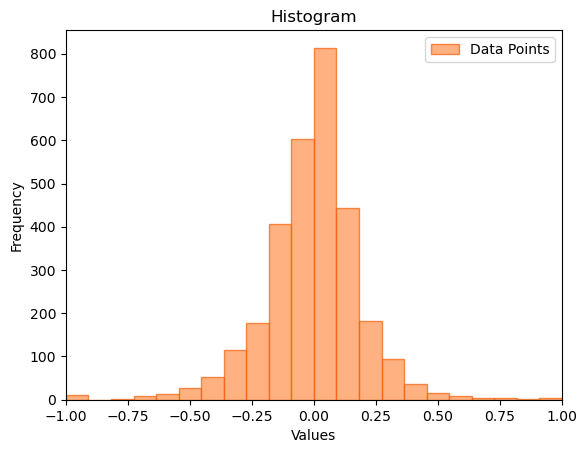


--------------------------------------------------------------------------------
                               Sentiment: 1


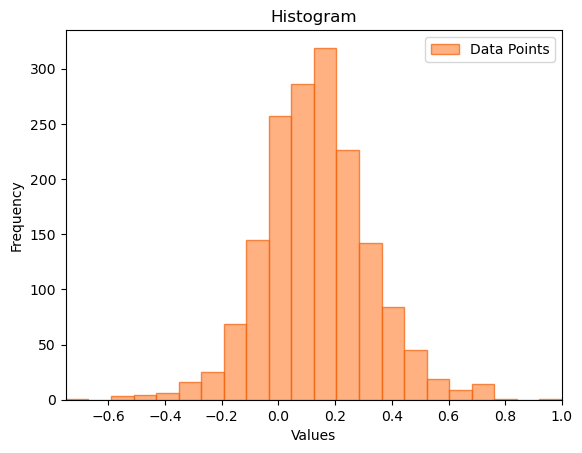


--------------------------------------------------------------------------------
                               Sentiment: 2


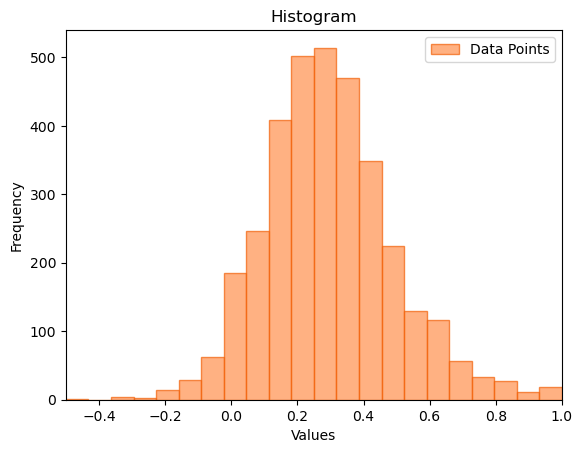

In [62]:
# Get unique values of 'Overall Rating' column and sort them in ascending order
unique_tags = sorted(data['Sentiment'].unique())

# Loop through sorted unique tags
for tag in unique_tags:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {tag}')
    functions.histogram(data[data['Sentiment'] == tag]['textblob_polarity_compound'])
    print('')
